# Level Acceleration

This notebook demonstrates the calculation of climb performance from a level acceleration test using the energy height calculation.

Some common notebook setup.

In [2]:
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt

Load in the data.

In [3]:
data = np.genfromtxt('TestPoint1.csv', delimiter=',', names=True)

Generate 0 based time values.

In [4]:
time = data['GPSSecondsToday'] - data[0]['GPSSecondsToday']

Take a look at the IAS and altitude during the test point.

<IPython.core.display.Javascript object>


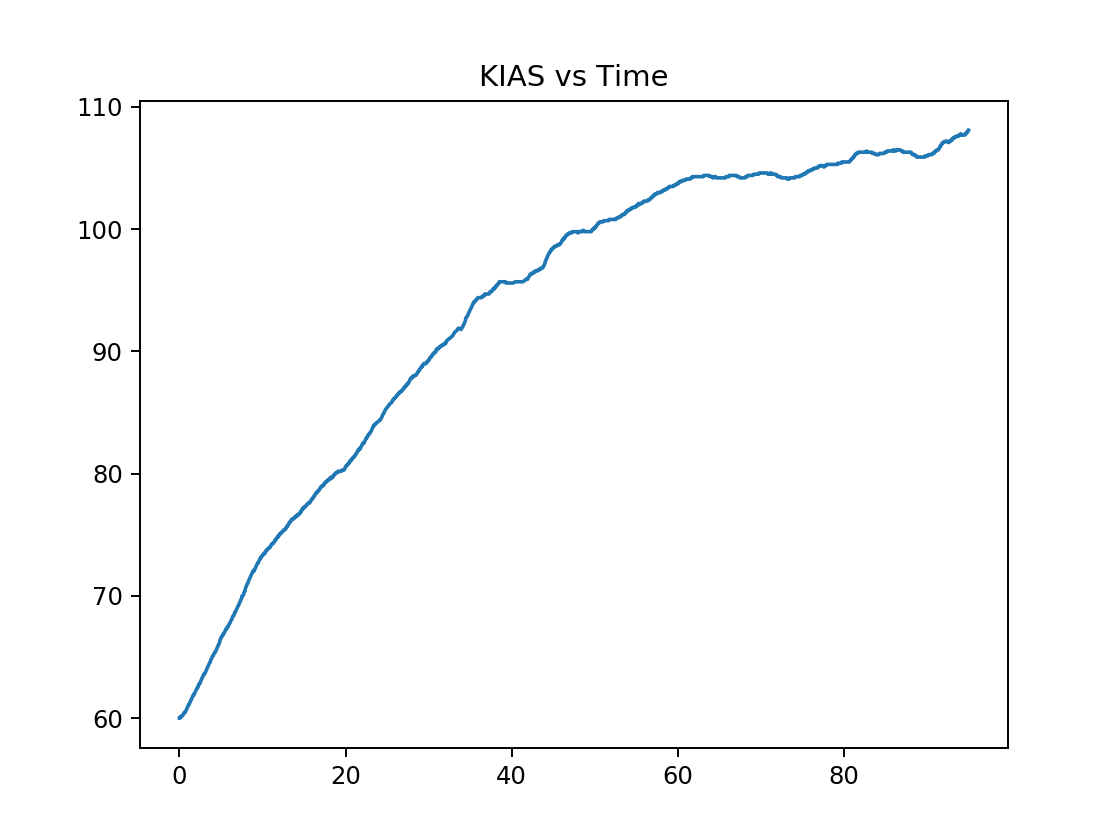

<IPython.core.display.Javascript object>


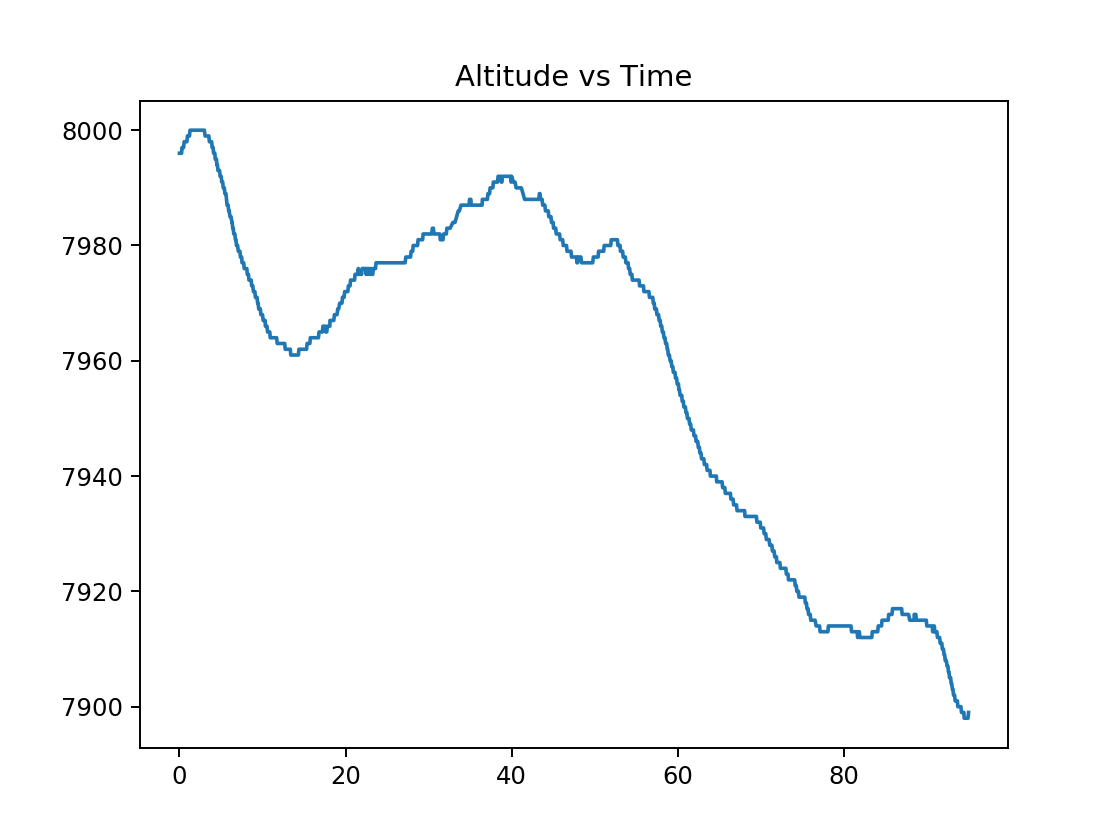

In [27]:
plt.figure()
plt.title("KIAS vs Time")
plt.plot(time, data['IASkt'])

plt.figure()
plt.title("Altitude vs Time")
plt.plot(time, data['Altitude']);

Calculate TAS from IAS, assuming ISA standard day and pressure altitude of 8000ft.

In [6]:
TASData = data["IASkt"] * 1.127

Let's create a 4th order polynomial in order to smooth out the noise in the TAS data.

In [7]:
TASPoly = np.polyfit(time, TASData, 4)
TASPoly

array([ 8.35357718e-07, -1.12549547e-04, -4.76448894e-03,  1.30503226e+00,
        6.85176924e+01])

Generate smoothed TAS data from the polynomial coefficients.

In [8]:
TASSmoothedData = TASPoly[0] * time**4 + TASPoly[1] * time**3 + TASPoly[2] * time**2 + TASPoly[3] * time + TASPoly[4]

Plot of the TAS data including the smoothed polynomial fit.

<IPython.core.display.Javascript object>


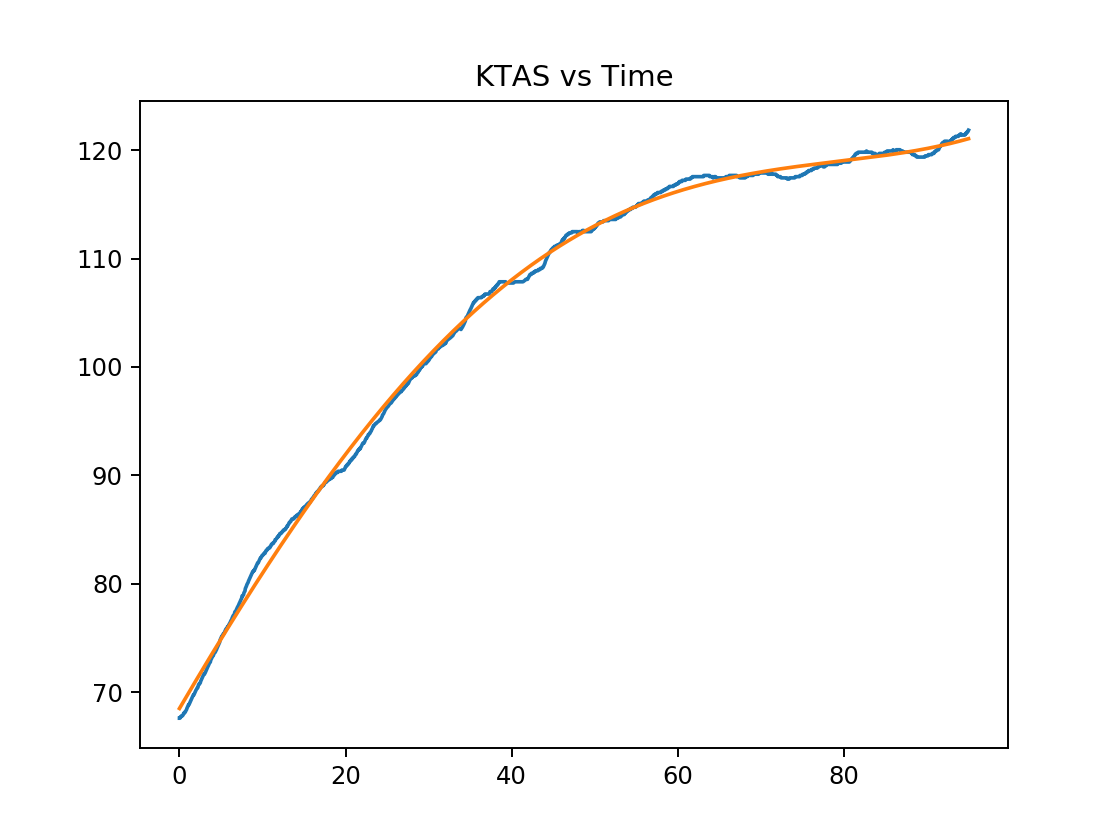

In [26]:
plt.figure()
plt.title("KTAS vs Time")
plt.plot(time, TASData)
plt.plot(time, TASSmoothedData);

Now calculate energy height:

$ \Large h_e = h + \frac{V_t^2}{2g}$

In [10]:
g = 32.2           # ft/s^2
ktTofps = 1.68     # conversion from kt to ft/s

heData = data['Altitude'] + ((TASSmoothedData * ktTofps)**2) / (2 * g)

Calculate a 3rd order polynomial fit for the energy height data..

In [11]:
hePoly = np.polyfit(time, heData, 3)
hePoly

array([ 1.05869372e-04, -9.02837617e-02,  1.13216119e+01,  8.16796156e+03])

In [13]:
heSmoothedData = hePoly[0] * time**3 + hePoly[1] * time**2 + hePoly[2] * time + hePoly[3]

<IPython.core.display.Javascript object>


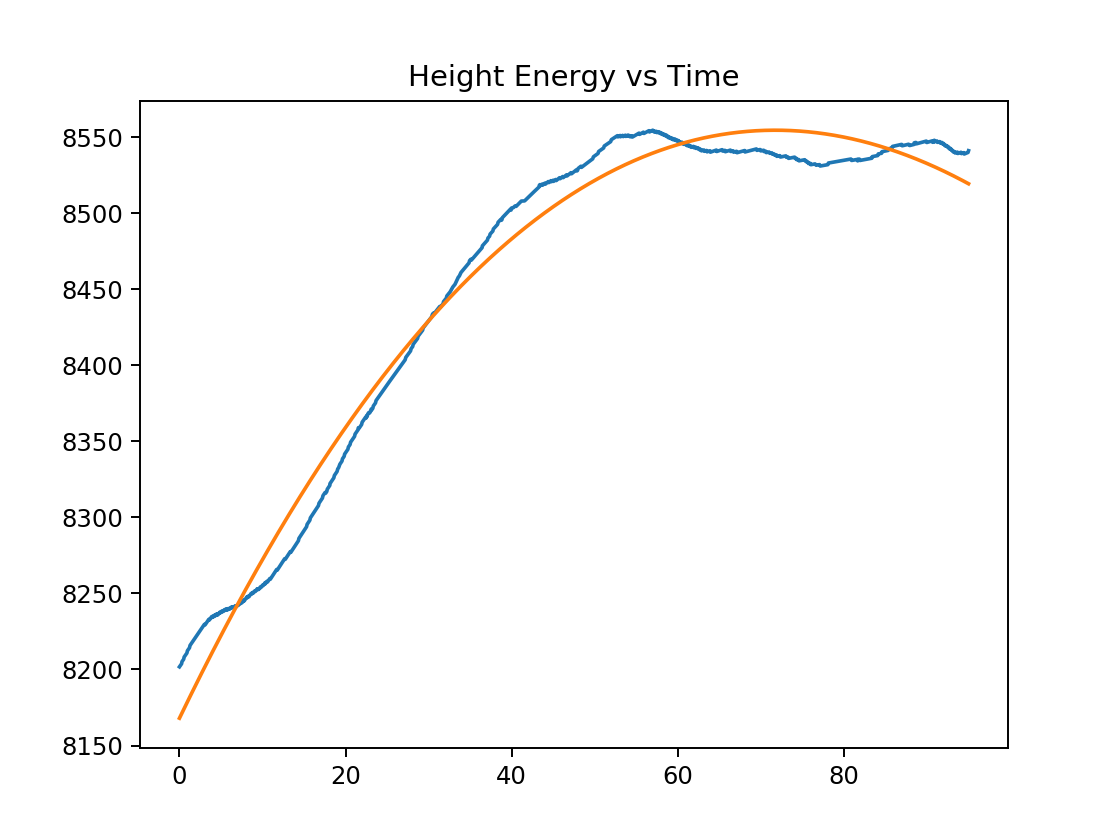

In [28]:
plt.figure()
plt.title("Height Energy vs Time")
plt.plot(time, heData)
plt.plot(time, heSmoothedData);

Now calculate excess power in ft/sec:

$\Large P_s = \frac{\mathrm{d} h_e}{\mathrm{d}t}$

In [16]:
dhedtPoly = [ 3*hePoly[0], 2*hePoly[1], 1*hePoly[2] ]
dhedtPoly

[0.00031760811471225774, -0.18056752335722503, 11.321611892714039]

In [25]:
PsData = (dhedtPoly[0] * time**2 + dhedtPoly[1] * time + dhedtPoly[2]) * 60  # fps to fpm

Generate smoothed IAS data from the smoothed TAS data. Again assuming ISA standard day at 8000ft.

In [22]:
IASSmoothedData = TASSmoothedData / 1.127

Finally plot Ps vs KIAS

<IPython.core.display.Javascript object>


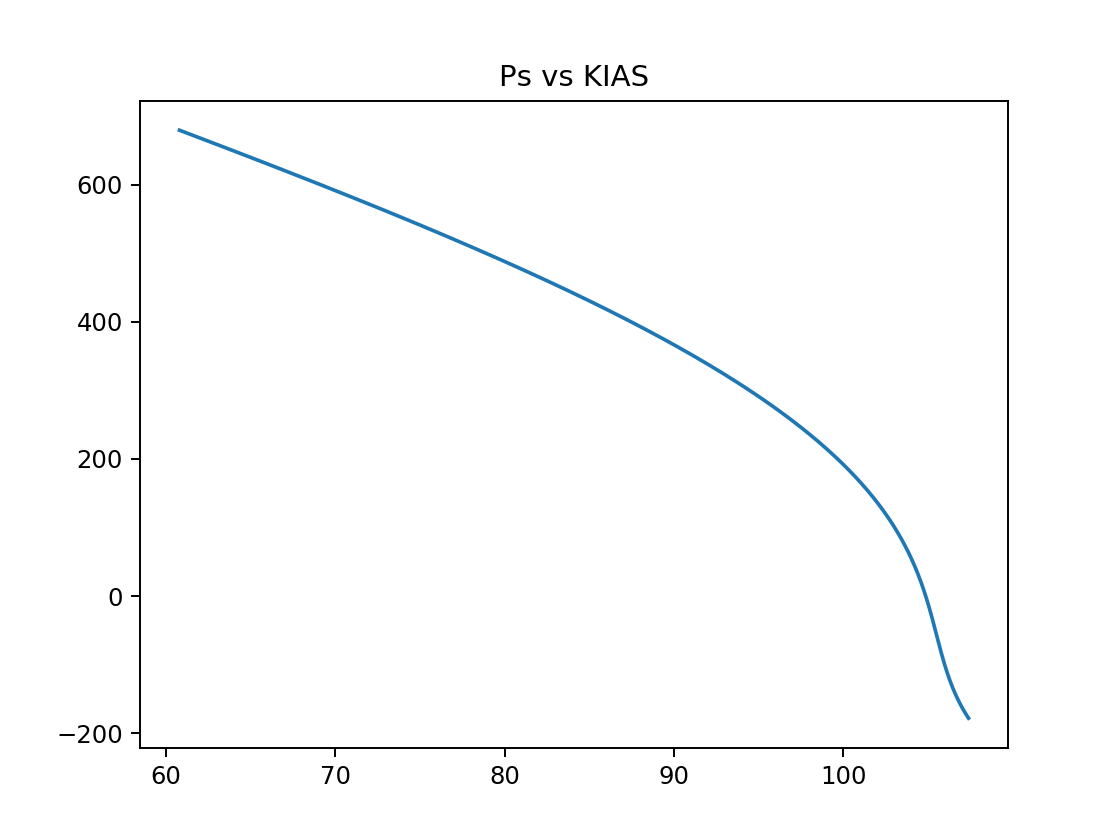

In [29]:
plt.figure()
plt.title("Ps vs KIAS")
plt.plot(IASSmoothedData, PsData);